# Ownerships in Bogota, Colombia

The main goal of this inmersion is to generate a model which predicts the cost of an ownership in the different neighborhoods in Bogota, using the dataset called "inmuebles_bogota.csv" and the survey "Encuesta Multipropósito Bogotá-Cundinamarca-EM-2021".

## Importing and describing our data

### Importing libraries that will be used

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [140]:
data.shape

(9520, 8)

## We will try to answere the next questions:

Q1.- How many categories are in the "Type" column and how many ownerships are in each one?

Q2.- How many ownerships by neighborhood are in our dataset?

Q3.- Is there any outlayer in the columns "Rooms", "Bathrooms", "Area"?

Q4.- What is the mean cost/m2 for each neighborhood? 


### 1.- Knowing and cleaning data

In this section I will remove any possible errors I might get because of 

- strange characters

- wrong type of values

- Values that does not make sense

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


- It is clear that the characters "ñ" and "Á" might be problematic, so I will take them off.

In [142]:
data=data.rename(columns={"Área":"Area",
                          "Baños":"Bathrooms",
                          "Descripcion":"Description",
                          "Habitaciones":"Rooms",
                          "Barrio":"Neighborhood",
                          "Valor":"Cost",
                          "Tipo":"Type"})

data.Type=data.Type.str.replace("Casa", "House")
data.Type=data.Type.str.replace("Apartamento", "Department")
data.Type=data.Type.str.replace("Lote", "Lot")
data.Type=data.Type.str.replace("Finca", "Land property")
data.Type=data.Type.str.replace("Oficina/Consultorio", "Office")
data.Type=data.Type.str.replace("Bodega", "Cellar")
data.Type=data.Type.str.replace("Edificio", "Building")


- I will change the data type of "Cost" column, from object (string) to float and I will change the unit to millions

In [143]:
data["cost_millions"] = data.Cost.str.split(regex=True, expand = True )[1] # regex = read regular expresions and expand returns a DataFrame
# I take the second column of the dataframe generated by expand = True because there we have the cost, that column it still a string type
data.cost_millions = data.cost_millions.str.replace(".","")
data.cost_millions = data.cost_millions.astype("float64")/1e6 #after clean our cost number, we change the type of the column to float and convert it
#to millions

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\3329334211.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.cost_millions = data.cost_millions.str.replace(".","")


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9520 non-null   object 
 1   Description    9520 non-null   object 
 2   Rooms          9520 non-null   int64  
 3   Bathrooms      9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Neighborhood   9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Cost           9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


Now data types are right, I will check for unusual values depending of the columns

In [145]:
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


I just need two decimals, so I will change the display of the numbers

In [195]:
pd.set_option("display.precision",2) #round all math operations to just 2 decimals
pd.set_option("display.float_format",lambda x: "%.2f" %x) # show the values with two decimals
data.describe()

,Rooms,Bathrooms,Area,cost_millions,cost_m2_millions_type
count,9499.00,9499.00,9499.00,9499.00,9499.00
mean,3.07,2.45,121.39,597.60,5.06
std,2.03,1.25,169.59,682.72,1.56
min,1.00,1.00,2.00,60.00,0.45
25%,2.00,2.00,57.00,250.00,4.24
50%,3.00,2.00,80.00,408.00,4.89
75%,3.00,3.00,135.00,680.00,6.18
max,110.00,9.00,8884.00,16000.00,12.77


For example, I can see the max rooms number and check for the info, just in case it might be a data that do not correspond with the Area value

In [147]:
data[data.Rooms == data.Rooms.max()]

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
897,House,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


Also we can looking for the colums with the min area

In [148]:
data.query("Area == @data.Area.min()")

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
8401,Department,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


As we can see, the number of rooms might be wrong because it has the same value as Area, and is a home, so it is impossible to have 110 rooms in a house with 110 m2 area, also, there's no reason to have 3 rooms in an 2 m2 area.

### Q1.- How many categories are in the "Type" column and how many ownerships are in each one?

There are 8 types of ownerships: 


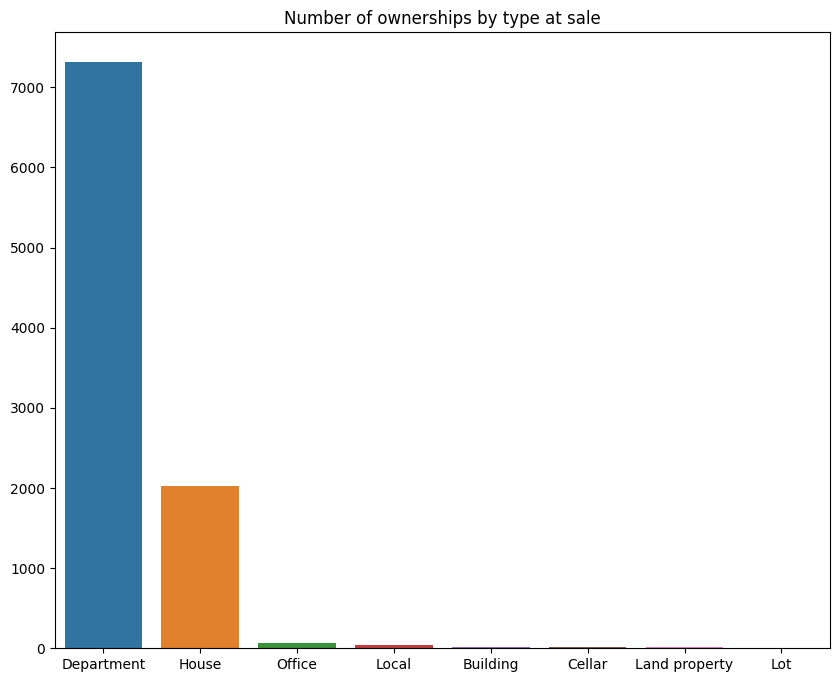

In [202]:

counts=data.Type.value_counts()
print(f"There are {len(counts)} types of ownerships: ")
plt.figure(figsize=((10,8)))
gp=sns.barplot(x=counts.index , y = counts)
gp.set_title("Number of ownerships by type at sale")
gp.set_ylabel("")
plt.show()

### Q2: How many ownerships by neighborhood are in our dataset?

The number of Neighborhoods that we have in our dataset is 149


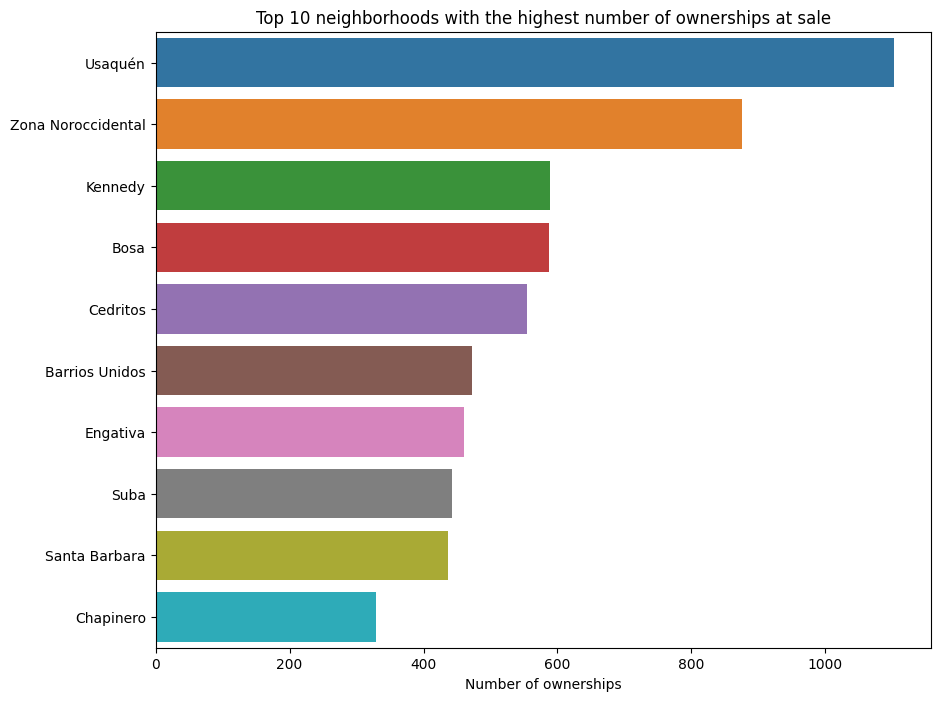

In [275]:
nbh_counts=data.Neighborhood.value_counts()
print(f"The number of Neighborhoods that we have in our dataset is {len(nbh_counts)}")
plt.figure(figsize=((10,8)))
fg=sns.barplot(y=nbh_counts[:10].index, x=nbh_counts[:10])
fg.set_xlabel("Number of ownerships")
fg.set_title("Top 10 neighborhoods with the highest number of ownerships at sale")
plt.show()

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\4263601844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.num[ind]=(data.Neighborhood[ind], data.Type[ind])


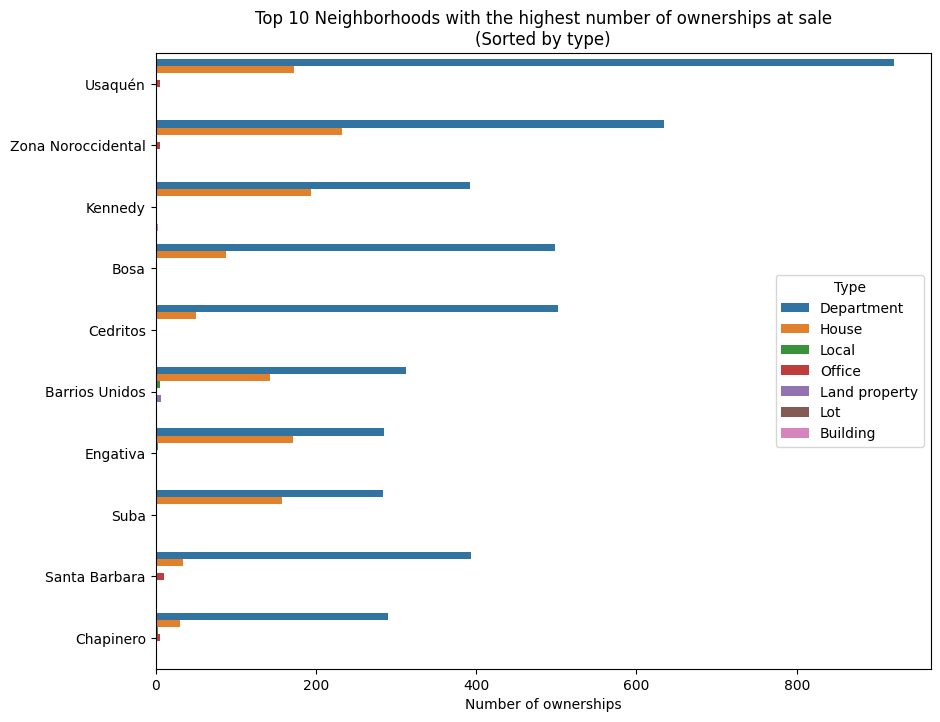

In [279]:
categ=dict(data.value_counts(["Neighborhood", "Type"]))
data["num"]=[0]*len(data)
for ind in data.index: 
    data.num[ind]=(data.Neighborhood[ind], data.Type[ind])
data.num=data.num.map(categ)



top10=nbh_counts[:10].index
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=data.query("Neighborhood in @top10"), x = "num", y="Neighborhood", hue="Type", order=top10)
fg.set_title("Top 10 Neighborhoods with the highest number of ownerships at sale\n(Sorted by type)")
fg.set_xlabel("Number of ownerships")
fg.set_ylabel("")
plt.show()
    

### Q3: Is there any outlayers in the "Bathrooms", "Area" and "Rooms" columns?

#### Boxplot: Rooms by type of onwership

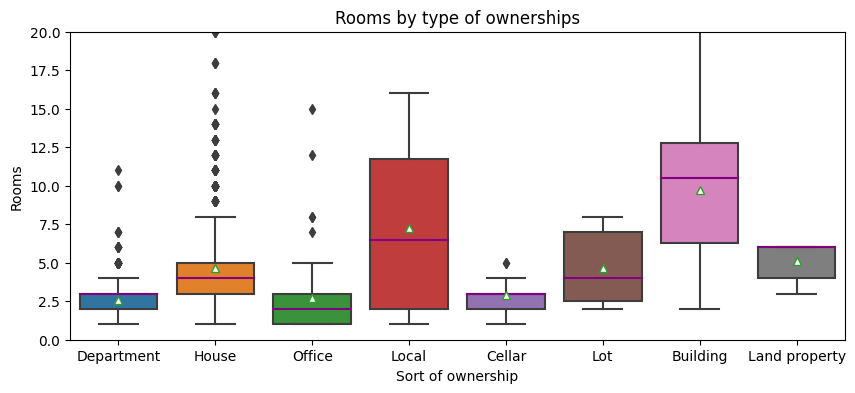

In [149]:
plt.figure(figsize=(10,4))
gp=sns.boxplot(
                data=data,
                x="Type",
                y="Rooms",
                showmeans=True,
                medianprops={
                    "color" : "purple",
                },
                meanprops={
                    "markerfacecolor" : "white",
                }
               
               ) #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Rooms by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylim(0,20)
gp.set_ylabel("Rooms")
plt.show()

#### Boxplot: Areas by type of onwership

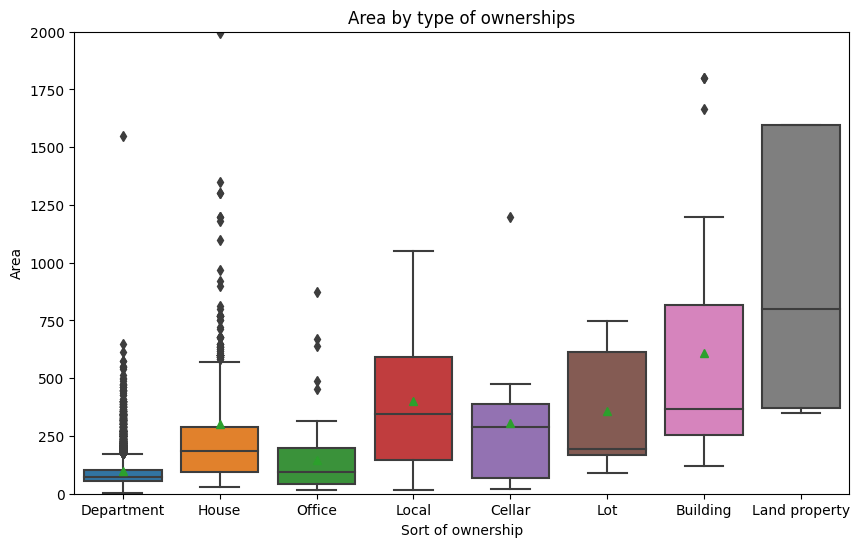

In [150]:
plt.figure(figsize=(10,6))
gp=sns.boxplot(data=data, x="Type",y="Area", showmeans=True) #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Area by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylabel("Area")
gp.set_ylim(0,2000)
plt.show()

#### Boxplot: Bathrooms by types of ownership

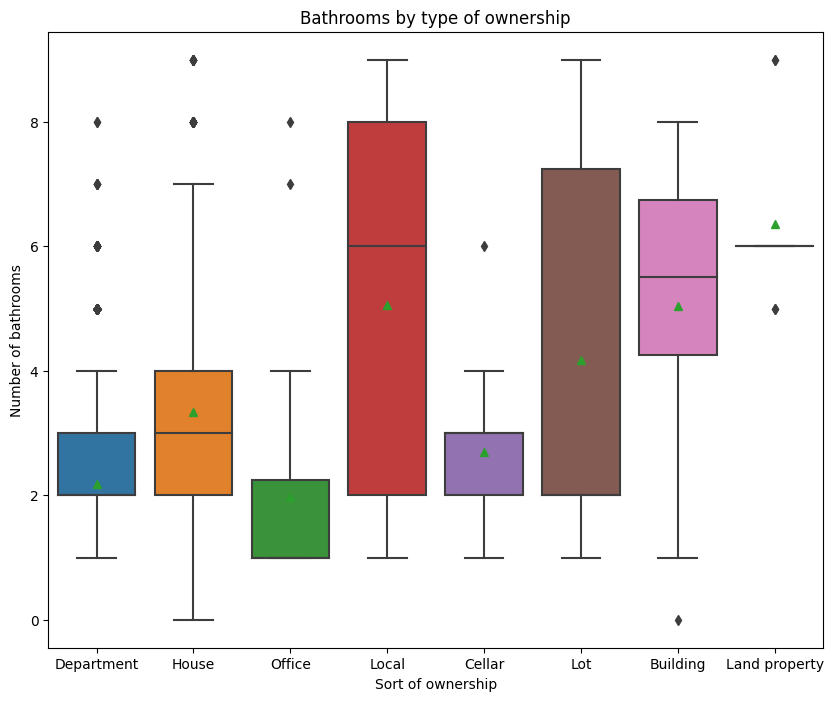

In [151]:
plt.figure(figsize=((10,8)))
fig=sns.boxplot(data=data, x="Type", y="Bathrooms", showmeans=True)
fig.set_title("Bathrooms by type of ownership")
fig.set_xlabel("Sort of ownership")
fig.set_ylabel("Number of bathrooms")
plt.show()

#### *Answering the third question. There are many outlayers of Area and Rooms, especially in departments and houses. Regarding to bathrooms, there are less outlayers, but the curious thing is that for land properties we have at least 5 bathrooms. Also one house and one building have zero bathrooms, so we can conclude it might have an error in those values.*

#### *Would be interesting if we keep those outlayers that are further than the upper whisker for areas, rooms and bathrooms of houses and departments. Moreover, we should remove data with zero bathrooms for houses and buildings, and those with a higher area than 1,000 m2 for houses and departments.*

In [152]:
data_out=data.query("((Area > 1000) & (Type == 'Department' | Type == 'House')) | Bathrooms < 1")
print(f"It will be removed {len(data_out)} columns")
data_out.head()
data.drop(data_out.index, inplace=True)
print(f"Shape of dataset with all outlayers listed removed: {data.shape}")

It will be removed 21 columns
Shape of dataset with all outlayers listed removed: (9499, 9)


### Q4: What is the average cost/m2 for each neighborhood? 

In [298]:
subdata=data.groupby(["Neighborhood","Type"]).aggregate({
    
    "Area": np.sum,
    "cost_millions":np.sum
    
})
subdata["cost_m2_million"]=subdata.cost_millions/subdata.Area
subdata.sort_values("cost_m2_million", ascending=False)
dict_cost_m2_million=dict(subdata.cost_m2_million)
data["cost_m2_million"]=[0]*len(data)
for i in data.index:
    data.cost_m2_million[i] = (data.Neighborhood[i],data.Type[i])
data.cost_m2_million=data.cost_m2_million.map(dict_cost_m2_million)
data.head()



C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\1432339838.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cost_m2_million[i] = (data.Neighborhood[i],data.Type[i])


,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,cost_m2_millions_type,num_types_nbhd,num,cost_m2_million
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,4.89,0,634,4.89
1,House,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,3.04,0,14,3.04
2,Department,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,8.30,0,209,8.30
3,Department,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,6.18,0,921,6.18
4,Department,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,6.34,0,96,6.34


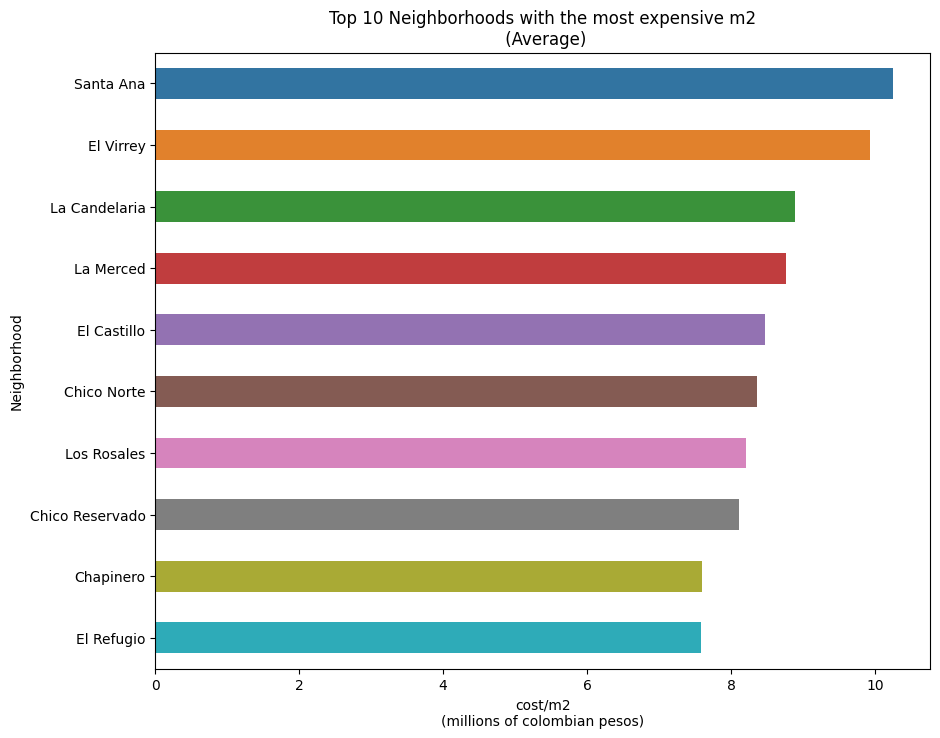

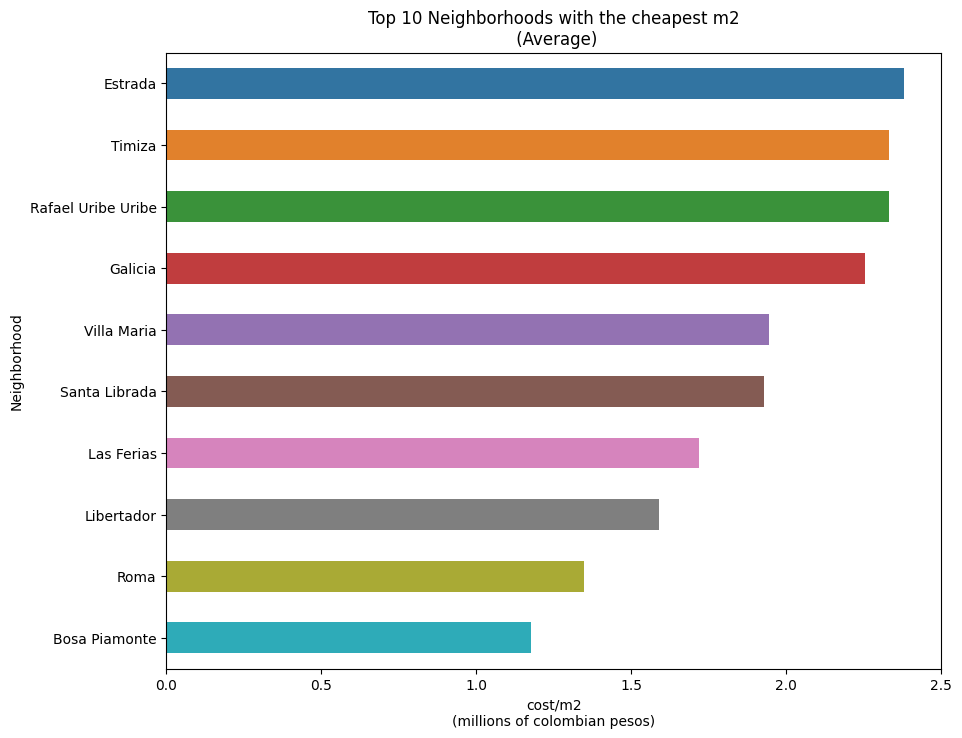

In [347]:
subdata=data.groupby("Neighborhood").aggregate({"Area": np.sum, "cost_millions":np.sum})
subdata["cost/m2/nbh"]=subdata.cost_millions/subdata.Area
subdata.reset_index(drop=False,inplace=True)
subdata.sort_values("cost/m2/nbh", inplace=True,ascending=False)
top10_expensive=subdata.Neighborhood[:10]


# Top 10 most expensive
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=subdata[:10],y="Neighborhood", x="cost/m2/nbh", width=0.5)
fg.set_title("Top 10 Neighborhoods with the most expensive m2\n (Average)")
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
plt.show()





#Top 10 cheapest
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=subdata[-10:],y="Neighborhood", x="cost/m2/nbh", width=0.5)
fg.set_title("Top 10 Neighborhoods with the cheapest m2\n (Average)")
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
plt.show()

top10_cheap=subdata.Neighborhood[-10:]

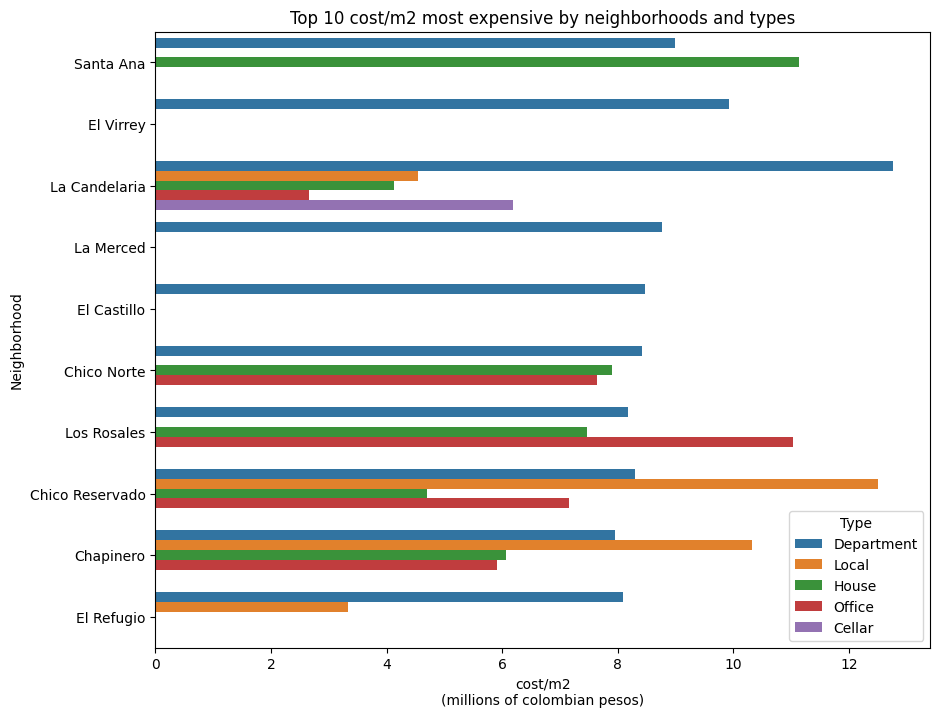

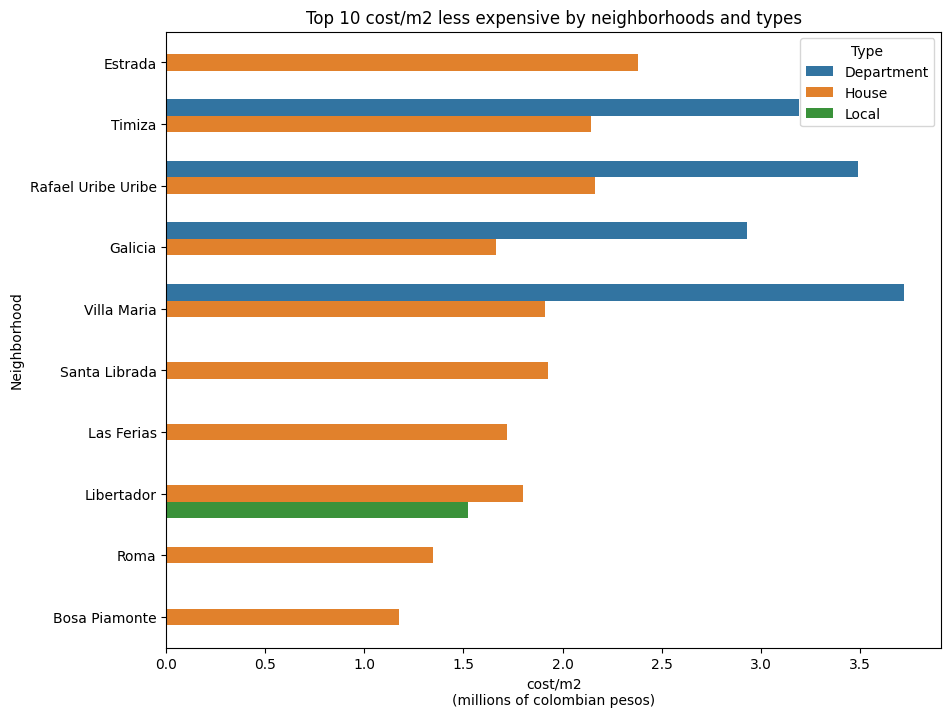

In [345]:
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=data.query("Neighborhood in @top10_expensive"), x="cost_m2_million", y="Neighborhood", hue="Type", order=top10_expensive)
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
fg.set_title("Top 10 cost/m2 most expensive by neighborhoods and types")
plt.show()



plt.figure(figsize=((10,8)))
fg=sns.barplot(data=data.query("Neighborhood in @top10_cheap"), x="cost_m2_million", y="Neighborhood", hue="Type", order=top10_cheap)
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
fg.set_title("Top 10 cost/m2 less expensive by neighborhoods and types")

plt.show()

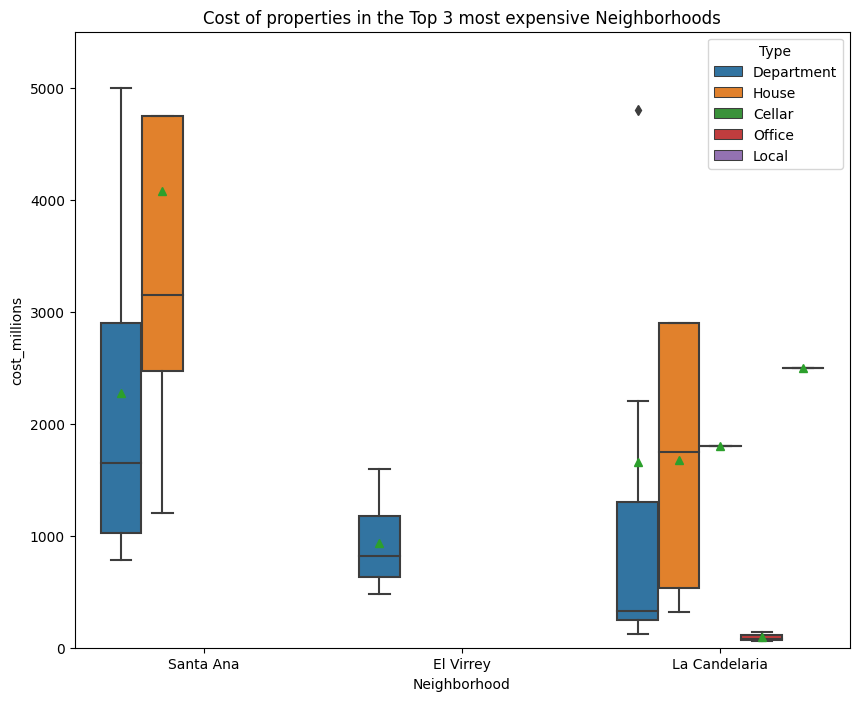

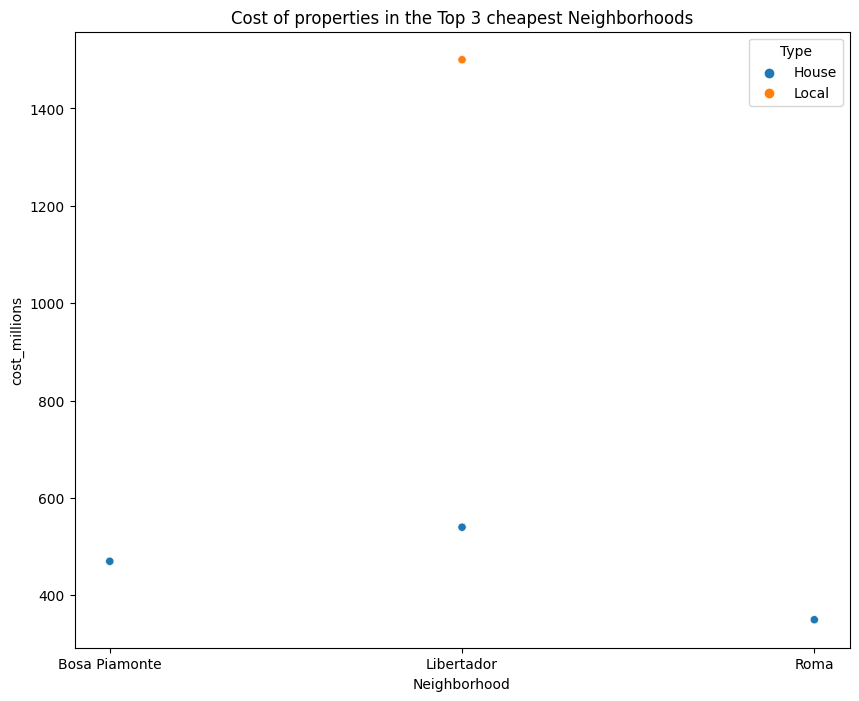

In [359]:
top3_expensive=top10_expensive[:3]
top3_cheap=top10_cheap[-3:]

plt.figure(figsize=((10,8)))
fg=sns.boxplot(data=data.query("Neighborhood in @top3_expensive"), x="Neighborhood", y="cost_millions", hue="Type", order=top3_expensive,showmeans=True)
fg.set_title("Cost of properties in the Top 3 most expensive Neighborhoods")
fg.set_ylim(0,5500)
plt.show()

plt.figure(figsize=((10,8)))
fg=sns.scatterplot(data=data.query("Neighborhood in @top3_cheap"), x="Neighborhood", y="cost_millions", hue="Type")
fg.set_title("Cost of properties in the Top 3 cheapest Neighborhoods")
#fg.set_ylim(0,5500)
plt.show()

Lines drawn alone represents my boxplot. It is because cuartile 1 and 3, or percentil 25 and 75 has the same number, so the box became a line, it's hard to have many ownerships with the same cost, so it might be just one data in each type where I got a line. I will remove those types of ownership

#### *We can notice that the most expensive neighborhoods has a cost/m2 almost 10 times more expensive than the cheapest one. Also the majority of the cheapest neighborhoods sells homes, whereas the expensive ones sells more departments, locals and houses.*

In [160]:
dict_groups.values()

dict_values([5.979381443298969, 4.70020325203252, 3.624056813138038, 6.745136186770428, 4.166666666666667, 3.7874769230769227, 2.5617542728152207, 4.4748338081671415, 2.766798418972332, 4.773226258631714, 3.898335546180122, 0.4522628469212246, 5.842829076620825, 2.7882037533512065, 6.395348837209302, 6.343670802516835, 6.031152647975078, 6.25, 2.522711390635919, 2.857142857142857, 5.384615384615385, 5.626949740034662, 4.54798331015299, 2.9043498445223985, 2.3986465987200756, 1.175, 3.1666666666666665, 6.046475195822455, 3.864097363083164, 5.50655737704918, 2.273105745212323, 2.6, 4.0625, 5.888534346312125, 4.436450839328537, 5.5393794749403344, 3.9269406392694064, 3.1, 6.95067264573991, 4.26628895184136, 3.0431952662721895, 5.168311289743762, 4.327282668124658, 8.513513513513514, 6.202830188679245, 7.955610984761388, 6.065894924309884, 10.318275154004107, 5.918367346938775, 7.2948994252873565, 4.735376044568246, 6.360286919831224, 4.992869875222817, 7.425742574257426, 8.4230673377755, 

As we can see, keys in our dictionary are tuples, so I need to write each one in the "data" dataframe. So then I can match the values required.

In [161]:
data["cost_m2_millions_type"]=[0]*len(data)
for value in data.index:
        data.cost_m2_millions_type[value] = (data.Neighborhood[value],data.Type[value])

data.head()
    

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\1360522773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cost_m2_millions_type[value] = (data.Neighborhood[value],data.Type[value])


,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,cost_m2_millions_type
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,"(Zona Noroccidental, Department)"
1,House,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,"(Castilla, House)"
2,Department,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,"(Chico Reservado, Department)"
3,Department,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,"(Usaquén, Department)"
4,Department,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,"(Bella Suiza, Department)"


In [162]:
data.cost_m2_millions_type=data.cost_m2_millions_type.map(dict_groups)
data.head()

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,cost_m2_millions_type
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,4.89
1,House,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,3.04
2,Department,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,8.30
3,Department,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,6.18
4,Department,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,6.34


As we can see, I just created a new column where our cost_m2 will be stored, but with the neighborhood values, our keys in our dictionary. 
With the function .map() i can change those keys with our values

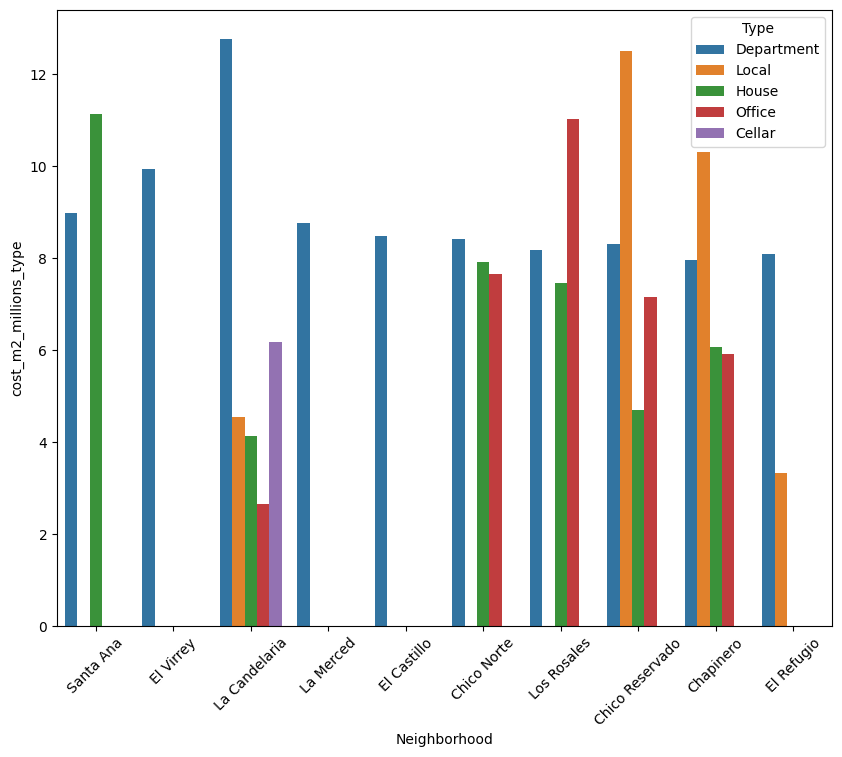

In [163]:
top10=data.Neighborhood.value_counts(ascending=False).index[:10]
top10_df=data.query("Neighborhood in @top10_avg_cost_m2")
top10_df.head()

plt.figure(figsize=((10,8)))
sns.barplot(data=top10_df, y="cost_m2_millions_type", hue="Type", x="Neighborhood", order=top10_avg_cost_m2)
plt.xticks(rotation=45)
plt.show()

And now I just select the top 10 neighborhoods with the highest number of ownerships at sale in our dataset

In [258]:
top10=data.Neighborhood.value_counts()[:10].index.tolist()
top10_df=data.query("Neighborhood in @top10")
plt.figure(figsize=(10,8))
sns.barplot(data=top10_df, y = "Neighborhood", x = "cost_m2_millions", hue="Type")
plt.show()


ValueError: Could not interpret input 'cost_m2_millions'

<Figure size 1000x800 with 0 Axes>